### Machine Learning With Python: Linear Regression With One Variable

In [1]:
import pandas as pd
import numpy as np
from sklearn import linear_model
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('homeprices.csv')

In [3]:
df

,area,price
0,2600,550000
1,3000,565000
2,3200,610000
3,3600,680000
4,4000,725000


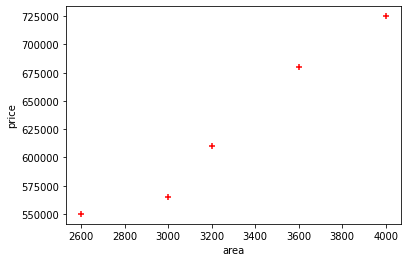

In [4]:
plt.xlabel('area')
plt.ylabel('price')
plt.scatter(df.area, df.price, marker='+', color='red')

In [5]:
new_df = df.drop('price', axis='columns')

In [6]:
new_df

,area
0,2600
1,3000
2,3200
3,3600
4,4000


In [7]:
price=df.price

In [8]:
price

0    550000
1    565000
2    610000
3    680000
4    725000
Name: price, dtype: int64

### Create linear regression object

In [9]:
reg = linear_model.LinearRegression()

In [10]:
reg.fit(new_df, price)

LinearRegression()

#### (1) Predict price of a home with area = 3300 sqr ft

In [11]:
reg.predict([[3300]])

array([628715.75342466])

### Y = m * X + c (m is coefficient and c is intercept)

In [12]:
reg.coef_

array([135.78767123])

In [13]:
reg.intercept_

180616.43835616432

#### (1) Predict price of a home with area = 5000 sqr ft

In [14]:
reg.predict([[5000]])

array([859554.79452055])

### Generate CSV file with list of home price predictions

In [15]:
area_df = pd.read_csv('areas.csv')

In [16]:
area_df.head()

,area
0,1000
1,1500
2,2300
3,3540
4,4120


In [17]:
p = reg.predict(area_df)

In [18]:
p

array([ 316404.10958904,  384297.94520548,  492928.08219178,
        661304.79452055,  740061.64383562,  799808.21917808,
        926090.75342466,  650441.78082192,  825607.87671233,
        492928.08219178, 1402705.47945205, 1348390.4109589 ,
       1144708.90410959])

In [19]:
area_df['prices'] =p

In [20]:
area_df.head()

,area,prices
0,1000,316404.109589
1,1500,384297.945205
2,2300,492928.082192
3,3540,661304.794521
4,4120,740061.643836


In [21]:
area_df.to_csv('prediction.csv', index=False)

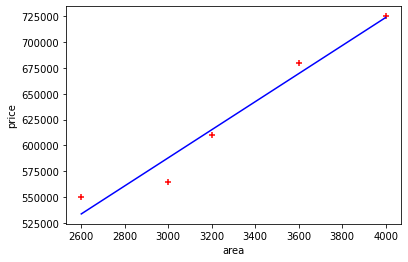

In [22]:
plt.xlabel('area')
plt.ylabel('price')
plt.scatter(df.area, df.price, marker='+', color='red')
plt.plot(df.area, reg.predict(df[['area']]), color='blue')

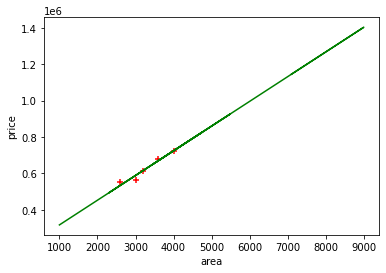

In [23]:
plt.xlabel('area')
plt.ylabel('price')
plt.scatter(df.area, df.price, marker='+', color='red')
plt.plot(area_df.area, reg.predict(area_df[['area']]), color='green')